In [43]:
!pip install openweathermapy



In [44]:
!pip install citipy

In [58]:
import csv
import matplotlib.pyplot as plt
import requests 
import pandas as pd
import numpy as np
import time
import seaborn as sns
import openweathermapy.core as ow
  

In [59]:
from citipy import citipy

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=15.000, high=55.000, size=1500)
lngs = np.random.uniform(low=-135.000, high=0.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# Print the city count to confirm sufficient count
# If the city is unique, then add it to a our cities list\n",
    if city not in cities:
        cities.append(city)
    
len(cities)

582

In [61]:
lat_lngs

In [62]:
# Save config information.
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
#url = "http://api.openweathermap.org/data/2.5/weather?"
settings={"unit":'Imperial', "apid":api_key}



 
      


In [63]:
weather_data = {"city": cities}
weather_data = pd.DataFrame(weather_data)
weather_data['lat']=''
weather_data['temp']=''
weather_data['humidity']=''
weather_data['cloudiness']=''
weather_data['winds']=''


weather_data.head()



,city,lat,temp,humidity,cloudiness,winds
0,saint george,,,,,
1,merritt island,,,,,
2,hanna,,,,,
3,storm lake,,,,,
4,englewood,,,,,


In [64]:
city = []
for index, row in weather_data.iterrows():
    try:
        current_weather = ow.get_current(row['city'], **settings)
        weather_data.set_value(index,'lat',current_weather['coord']['lat'])
        weather_data.set_value(index,'temp',current_weather['main']['temp'])
        weather_data.set_value(index,'humidity',current_weather['main']['humidity'])
        weather_data.set_value(index,'cloudiness',current_weather['clouds']['all'])
        weather_data.set_value(index,'winds',current_weather['wind']['speed'])
        city.append(row['city'])
        print('--', end=' ')
    except:
        print(row['city'], end = ' ')
   

saint george merritt island hanna storm lake englewood elko areosa vila franca do campo rancho palos verdes gao beatrice van buren port hardy tasiilaq cape canaveral torbay praia da vitoria cedar city constitucion sweetwater ribeira grande lompoc santiago do cacem cap-aux-meules attawapiskat plouzane codrington ponta do sol port hueneme araouane baker city bloomfield los llanos de aridane saint-augustin belgrade la union vila nova de milfontes sabinas hearst channel-port aux basques bayshore gardens bathsheba saint-ambroise saint-francois santa cruz de rosales cockburn harbour nador onda ponta delgada matane nouadhibou fortuna las vegas la reforma lazaro cardenas macomb rock sound valle de juarez pacifica key largo sept-iles kinsale guerrero negro burns lake melilla gillette jamestown lagos cabo san lucas glace bay lagoa madera nantucket marrakesh saint anthony watertown road town show low nanortalik la orilla albany marion winnemucca magnolia muros hilo north bend marsh harbour campbe

In [57]:
#only keep data that we found values
weather_data = weather_data[weather_data['city'].isin(city)]
weather_data.head()

,city,lat,temp,humidity,cloudiness,winds


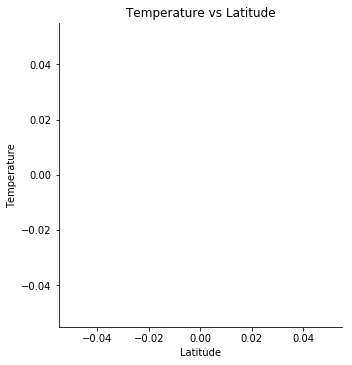

In [38]:
sns.lmplot(x='lat',y='temp', data=weather_data, fit_reg=False)
plt.title('Temperature vs Latitude'),
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

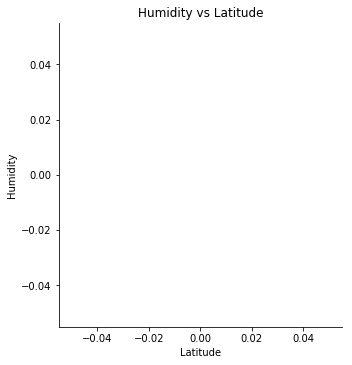

In [39]:
sns.lmplot(x='lat',y='humidity', data= weather_data, fit_reg=False)
plt.title('Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

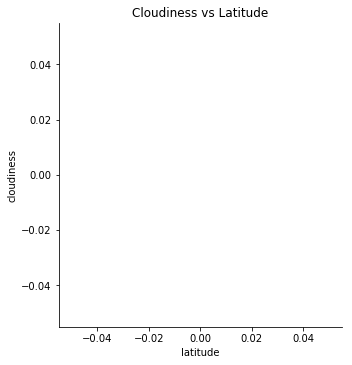

In [40]:
sns.lmplot(x='lat',y='cloudiness', data=weather_data, fit_reg=False)
plt.title('Cloudiness vs Latitude')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.show()

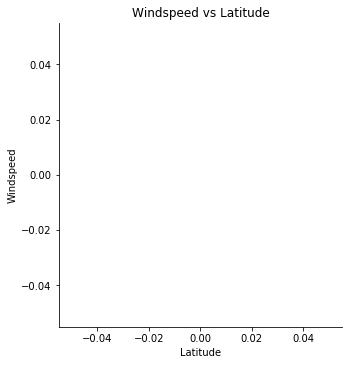

In [42]:
sns.lmplot(x='lat',y='winds', data=weather_data, fit_reg=False)
plt.title('Windspeed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()